In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import src.trainers as tr
import src.read_pic as rp
import os
# Fields to read.
fields_to_read={"B":True,"B_ext":False,"divB":True,"E":True,"E_ext":False,"rho":True,"J":True,
                "P":True,"PI":False,"Heat_flux":False,"N":False,"Qrem":False}
# Path of the folder containing the .h5 files to read.
files_path="/volume1/scratch/share_dir/ecsim/peppe/" #"/lustre1/project/stg_00032/share_dir/brecht/" # "/users/cpa/francesc/share_dir/SW/data_small/" #"/users/cpa/francesc/share_dir/jincai/dat_FF2D07e/" #="/users/cpa/francesc/share_dir/nn/data/raw_data/"
experiments = [f.name for f in os.scandir(files_path) if f.is_dir()]
print(f"{experiments = }")

experiments = ['data', 'T2D10c1_filter2', 'T2D12_filter2', 'data_filter', 'T2D13_filter2', 'T2D15_filter2', 'data_filter2', 'T2D16_filter2', 'T2D14_filter2']


In [ ]:
experiment = 'T2D10c1_filter2'
species = 'e'
data, X, Y, qom, times = rp.get_exp_times([experiment], files_path, fields_to_read, choose_species=['e','i'], verbose=True)
data = data[experiment]

INFO:src.read_pic: reading /volume1/scratch/share_dir/ecsim/peppe//T2D10c1_filter2/SimulationData.txt
INFO:src.read_pic:Lx = 64.0, Ly = 64.0, nxc = 512, nyc = 512
INFO:src.read_pic:loading B
INFO:src.read_pic:loading E
INFO:src.read_pic:loading divB
INFO:src.read_pic:loading rho
INFO:src.read_pic:loading J
INFO:src.read_pic:loading P and/or PI
INFO:src.read_pic:Component Pyx for species e missing because tensor is symmetric
INFO:src.read_pic:Component Pyx for species i missing because tensor is symmetric
INFO:src.read_pic:Component Pzx for species e missing because tensor is symmetric
INFO:src.read_pic:Component Pzx for species i missing because tensor is symmetric
INFO:src.read_pic:Component Pzy for species e missing because tensor is symmetric
INFO:src.read_pic:Component Pzy for species i missing because tensor is symmetric
INFO:src.read_pic:loading Ppar and Pperp
INFO:src.read_pic:loading Ppar and Pperp
INFO:src.read_pic:choose_x = [0, 512], choose_y = [0, 512], choose_z = [0, 1], c

field = 'Jz' mu = 7.490198310107068e-07 std = 0.0009981286550611607


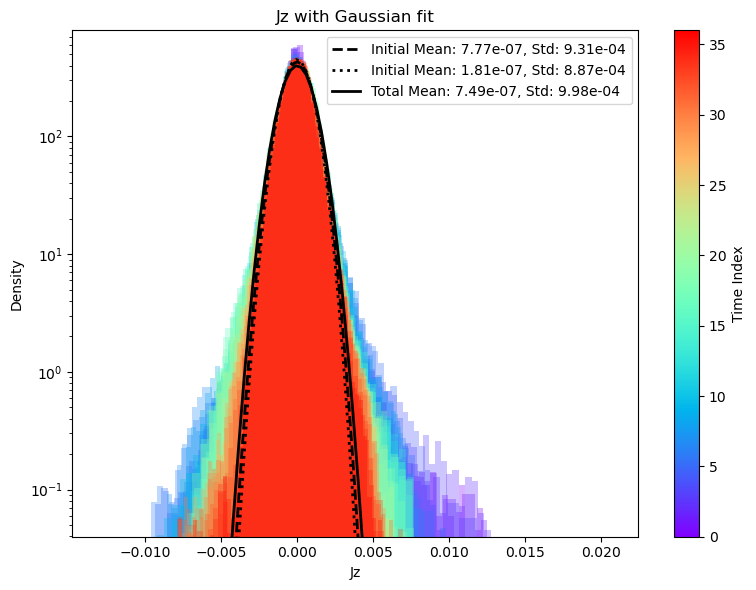

In [ ]:
field = 'Jz'

fig, ax = plt.subplots(figsize=(8, 6))

if field in ['Jx', 'Jy', 'Jz', 'rho', 'Pxx', 'Pyy', 'Pzz', 'Pxy', 'Pxz', 'Pyz']:
    field_flat = data[field][species].flatten()
    times = data[field][species].shape[-1]
else:
    field_flat = data[field].flatten()

# Fit a Gaussian to the data
mu, std = norm.fit(field_flat)

print(f"{field = } {mu = } {std = }")

colors = plt.cm.rainbow(np.linspace(0, 1, times))

for time in range(times):
    if field in ['Jx', 'Jy', 'Jz', 'rho', 'Pxx', 'Pyy', 'Pzz', 'Pxy', 'Pxz', 'Pyz']:
        field_flat = data[field][species][...,time].flatten()
    else:
        field_flat = data[field][...,time].flatten()
    # Compute mean and standard deviation
    mean_field = np.mean(field_flat)
    std_field = np.std(field_flat)
    #print(f"{mean_field = } {std_field = }")
    # Plot histogram
    ax.hist(field_flat, bins=50, density=True, alpha=0.3, color=colors[time])
    if time == 0:
        # Plot the Gaussian fit
        xmin, xmax = ax.get_xlim()
        mu1, std1 = norm.fit(field_flat)
        x = np.linspace(xmin, xmax, 100)
        p1 = norm.pdf(x, mu1, std1)
        ax.plot(x, p1, 'k', linestyle='dashed', linewidth=2, label=f'Initial Mean: {mu1:.2e}, Std: {std1:.2e}')
    elif time == times - 1:
        # Plot the Gaussian fit
        xmin, xmax = ax.get_xlim()
        mu1, std1 = norm.fit(field_flat)
        x = np.linspace(xmin, xmax, 100)
        p1 = norm.pdf(x, mu1, std1)
        ax.plot(x, p1, 'k', linestyle='dotted', linewidth=2, label=f'Initial Mean: {mu1:.2e}, Std: {std1:.2e}')


# Add colorbar
sm = plt.cm.ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=0, vmax=times-1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Time Index')
# Plot the Gaussian fit
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2, label=f'Total Mean: {mu:.2e}, Std: {std:.2e}')

ax.set_xlabel(field)
ax.set_ylabel('Density')
ax.set_title(f'{field} with Gaussian fit')
ax.legend()
ax.set_yscale('log')
ax.set_ylim(p.max()/1e4, 2*p.max())

plt.tight_layout()
plt.show()


In [42]:

data.keys()

dict_keys(['Bx', 'By', 'Bz', 'Bmagn', 'Ex', 'Ey', 'Ez', 'Emagn', 'divB', 'rho', 'Jx', 'Jy', 'Jz', 'Vx', 'Vy', 'Vz', 'Jmagn', 'Vmagn', 'Pxx', 'Pxy', 'Pxz', 'Pyx', 'Pyy', 'Pyz', 'Pzx', 'Pzy', 'Pzz', 'Ppar', 'Pperp'])

field = 'Bx' mu = 2.863283018462916e-06 std = 0.008039216003597825
field = 'By' mu = 1.923958776542968e-07 std = 0.00815276292512022
field = 'Bz' mu = 0.009999488637647151 std = 0.006435951311351038
field = 'Ex' mu = -1.9022721519370523e-06 std = 0.00019525940353189004
field = 'Ey' mu = -1.5787972719015274e-06 std = 0.00020209382715918176
field = 'Ez' mu = -6.186434392942794e-08 std = 0.00016472575663846706
field = 'Jx' mu = -5.564208451010981e-07 std = 0.0008693482964347772
field = 'Jy' mu = -2.3226720615571947e-07 std = 0.0008286725869070023
field = 'Jz' mu = 7.490198310107068e-07 std = 0.0009981286550611607
field = 'rho' mu = -0.07957528610351733 std = 0.015880935657581127
field = 'Pxx' mu = 1.0585831541336992e-05 std = 3.0583392546268805e-06
field = 'Pyy' mu = 1.058636525787692e-05 std = 3.0111436924437694e-06
field = 'Pzz' mu = 1.0347667236950805e-05 std = 2.838449685851964e-06
field = 'Pxy' mu = -1.0647689668649804e-08 std = 4.621120290700009e-07
field = 'Pxz' mu = 1.580920815177

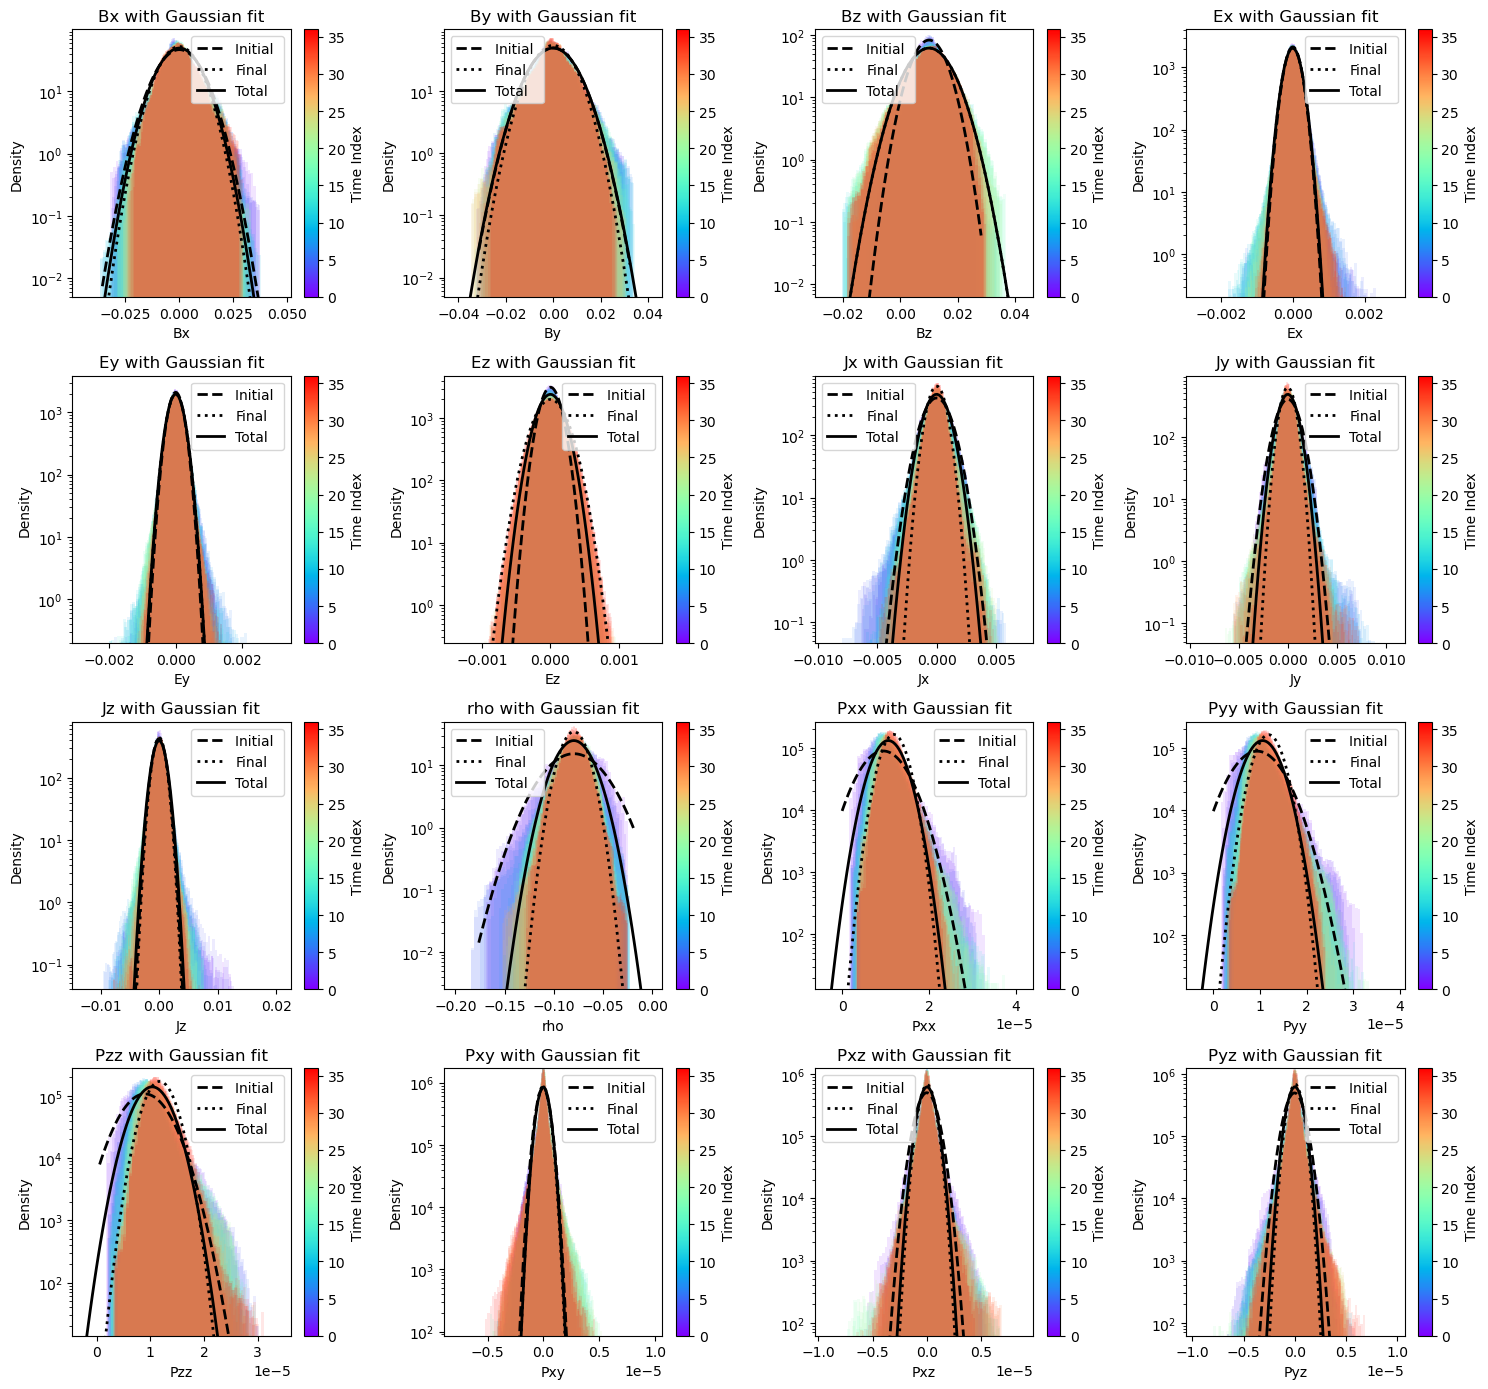

In [45]:
from scipy.stats import norm
species = 'e'
import numpy as np
fields = ['Bx', 'By', 'Bz', 'Ex', 'Ey', 'Ez','Jx','Jy','Jz', 'rho', 'Pxx', 'Pyy', 'Pzz', 'Pxy', 'Pxz', 'Pyz']
num_fields = len(fields)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 14))

for i, field in enumerate(fields):
    
    ax = axes.flat[i]
    
    if field in ['Jx', 'Jy', 'Jz', 'rho', 'Pxx', 'Pyy', 'Pzz', 'Pxy', 'Pxz', 'Pyz']:
        field_flat = data[field][species].flatten()
        iters = data[field][species].shape[-1]
    else:
        field_flat = data[field].flatten()
        iters = data[field].shape[-1]

    # Fit a Gaussian to the data
    mu, std = norm.fit(field_flat)

    print(f"{field = } {mu = } {std = }")

    colors = plt.cm.rainbow(np.linspace(0, 1, iters))

    for time in range(iters):
        if field in ['Jx', 'Jy', 'Jz', 'rho', 'Pxx', 'Pyy', 'Pzz', 'Pxy', 'Pxz', 'Pyz']:
            field_flat = data[field][species][...,time].flatten()
        else:
            field_flat = data[field][...,time].flatten()
        # Compute mean and standard deviation
        mean_field = np.mean(field_flat)
        std_field = np.std(field_flat)
        #print(f"{mean_field = } {std_field = }")
        # Plot histogram
        ax.hist(field_flat, bins=50, density=True, alpha=0.1, color=colors[time])
        if time == 0:
            # Plot the Gaussian fit
            xmin, xmax = ax.get_xlim()
            mu1, std1 = norm.fit(field_flat)
            x = np.linspace(xmin, xmax, 100)
            p1 = norm.pdf(x, mu1, std1)
            ax.plot(x, p1, 'k', linestyle='dashed', linewidth=2, label=f'Initial ') #Mean: {mu1:.2e}, Std: {std1:.2e}')
        elif time == iters - 1:
            # Plot the Gaussian fit
            xmin, xmax = ax.get_xlim()
            mu1, std1 = norm.fit(field_flat)
            x = np.linspace(xmin, xmax, 100)
            p1 = norm.pdf(x, mu1, std1)
            ax.plot(x, p1, 'k', linestyle='dotted', linewidth=2, label=f'Final') # Mean: {mu1:.2e}, Std: {std1:.2e}')


    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=0, vmax=iters-1))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Time Index')
    
    # Plot the Gaussian fit
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2, label=f'Total') # {mu:.2e}, Std: {std:.2e}')
    
    ax.set_xlabel(field)
    ax.set_ylabel('Density')
    ax.set_title(f'{field} with Gaussian fit')
    ax.legend()
    ax.set_yscale('log')
    #print(field_flat.max())
    ax.set_ylim(p.max()/1e4, 2*p.max())

plt.tight_layout()
plt.show()

In [46]:
Jx = np.sum([data['Jx'][species] for species in data['Jx'].keys()], axis=0)
Jy = np.sum([data['Jy'][species] for species in data['Jy'].keys()], axis=0)
Jz = np.sum([data['Jz'][species] for species in data['Jz'].keys()], axis=0)
J = np.sqrt(np.mean(Jx**2 + Jy**2 + Jz**2, axis=(0,1)))
Ji = np.sqrt(np.mean(data['Jx']['i']**2 + data['Jy']['i']**2 + data['Jz']['i']**2, axis=(0,1)))

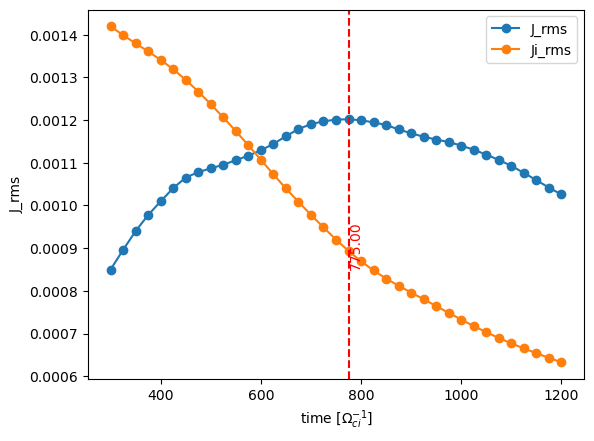

In [48]:
import matplotlib.pyplot as plt
plt.plot(times,J,'o-', label='J_rms')
plt.plot(times,Ji,'o-', label='Ji_rms')
plt.xlabel('time' + r" [$\Omega_{ci}^{-1}$]")
plt.axvline(x=times[np.argmax(J)], color='r', linestyle='--')
plt.text(times[np.argmax(J)], min(J), f'{times[np.argmax(J)]:.2f}', color='r', verticalalignment='bottom', rotation=90)
plt.ylabel('J_rms')
plt.legend()